---
# Import Libraries
---

In [1]:
import numpy as np 
import pandas 
import csv
import warnings
import nltk
import os
import time
from pathlib import Path
nltk.download('names', download_dir='/home/shared_data/textmining_genderrecognition_topicextraction/nltk')
from nltk.corpus import names
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
src='/home/shared_data/textmining_genderrecognition_topicextraction/dataset_text_mining_Reuters_RCV2/'

[nltk_data] Downloading package names to /home/shared_data/textmining_
[nltk_data]     genderrecognition_topicextraction/nltk...
[nltk_data]   Package names is already up-to-date!


---
# Data analysis with Plot
---

In [2]:
path_file=src+"clean_dataset_with_label.csv"
df=pandas.read_csv(path_file)
print(len(df))
df.head(2)

803066


,title,headline,autore,code,text,Genere,industry_codes,region_codes,topic_codes
0,"UK: UK shares set for nervous week,upside seen...","UK shares set for nervous week,upside seen lim...",Dale Faulken,"UK,M11,MCAT",The UK share market is unlikely to make much h...,Neutral,NaN,UK,"M11,MCAT"
1,USA: CBOT wheat ends mostly lower on weather.,CBOT wheat ends mostly lower on weather.,NaN,"USA,M14,M141,MCAT",CBOT soft red winter wheat futures closed most...,Unknown,NaN,USA,"M14,M141,MCAT"


In [3]:
def plot_token_occ(x,start,end, genere,title):
    token_lens = []
    for txt in x:
        txt_l=(str(txt)).split(' ')
        token_lens.append(len(txt_l))
    media=np.mean(token_lens)
    sns.distplot(token_lens)
    plt.xlim([start,end])
    plt.xlabel('Token count')
    plt.title(title+genere+" ="+ str(round(media,2)))
    plt.show()

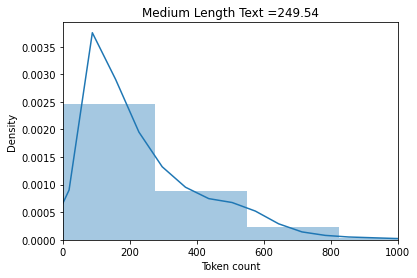

In [4]:
plot_token_occ(df['text'].tolist(),0,1000,'','Medium Length Text')

In [5]:
def bar_plot_label(ds,list_val=[],altri_val=[],column=[],title='',xlabel='',ylabel='',rotation_x=45,rotation_y=0):
    plt.figure(figsize = (5,5))
    column = column
    i=0
    for el in list_val:
        ris=ds[el].isna().sum()
        plt.bar(column[i]+':\n'+str(ris), ris)
        i+=1
    for el in altri_val:
        plt.bar(column[i]+':\n'+str(el), el)
        i+=1
    plt.xticks(rotation=rotation_x)
    plt.yticks(rotation=rotation_y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()    

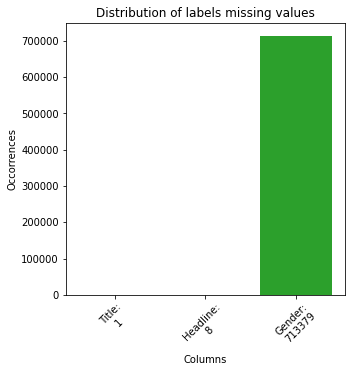

In [6]:
gender_sc=(df['Genere']=='Unknown').sum()
bar_plot_label(ds=df,list_val=['title','headline'],
               altri_val=[gender_sc],column=['Title','Headline', 'Gender'],
               title="Distribution of labels missing values",
               xlabel='Columns',ylabel='Occorrences',rotation_x=45,rotation_y=0)

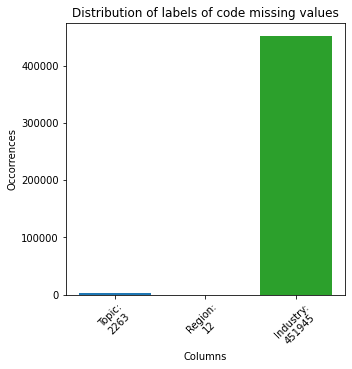

In [7]:
bar_plot_label(ds=df,list_val=['topic_codes','region_codes','industry_codes'],
               altri_val=[],column=['Topic', 'Region', 'Industry'],
               title="Distribution of labels of code missing values",
               xlabel='Columns',ylabel='Occorrences',rotation_x=45,rotation_y=0)

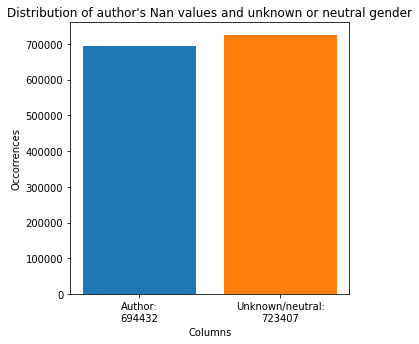

In [8]:
gender_sc=(df['Genere']=='Unknown').sum()+(df['Genere']=='Neutral').sum()
bar_plot_label(ds=df,list_val=['autore'],
               altri_val=[gender_sc],column=['Author','Unknown/neutral'],
               title="Distribution of author's Nan values and unknown or neutral gender",
               xlabel='Columns',ylabel='Occorrences',rotation_x=0,rotation_y=0)

In [37]:
from random import randint
def plotta_label_pie_from_dict(occorrenze,size=(20,20),valori_plottati=2,title_chart='tipologia',fz=40):
    #ordina dizionario
    lb=list(occorrenze.keys())  
    diz={}
    occ=list(occorrenze.values())
    for i in range (len(occorrenze)):
        diz[lb[i]]=occ[i]
    sorted_dict = {}
    sorted_dict = sorted(diz.items(), key = lambda kv: kv[1])
    
    stampa={}
    num_stampe=valori_plottati
    for i in range (len(occorrenze)-num_stampe,len(occorrenze)):
        stampa[sorted_dict[i][0]]=int(sorted_dict[i][1])

    
    if(len(occorrenze)-num_stampe)>0:
        stampa['altro']=0        
        for i in range (len(occorrenze)-num_stampe):
            stampa['altro']+=int(sorted_dict[i][1])
    #stampa=occorrenze
    t=len(stampa)
    cs = []
    n = t
    for i in range(n):
        cs.append('#%06X' % randint(0, 0xFFFFFF))
    labels = list(stampa.keys())
    sizes = list(stampa.values())
    explode = np.zeros(t) 
    explode[t-2]=0.1
    fig1, ax1 = plt.subplots(figsize=size)
    ax1.pie(sizes, explode=explode,  autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 20},colors=cs)
    ax1.axis('equal')  
    ax1.legend(labels, prop={'size': 30})
    plt.title(title_chart,fontsize=fz)
    plt.show()

{'Female': 22019, 'Male': 57640, 'Neutral': 10028}


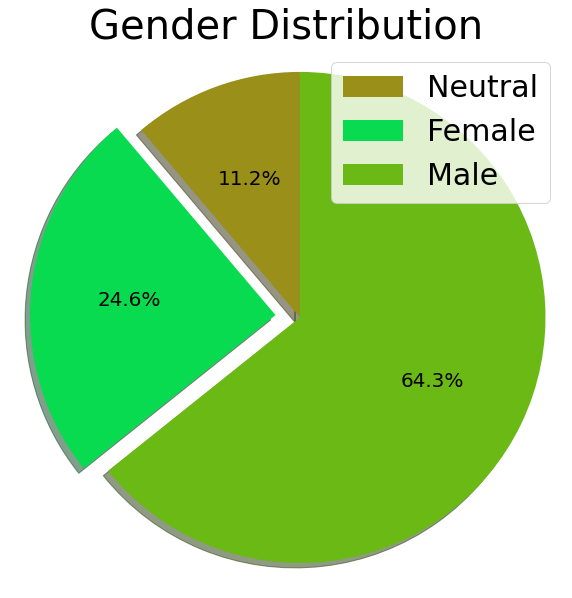

In [10]:
occorrenze_gender={'Female':(df['Genere']=='Female').sum(),
                   'Male':(df['Genere']=='Male').sum(),
                   'Neutral':(df['Genere']=='Neutral').sum() }
print(occorrenze_gender)
plotta_label_pie_from_dict(occorrenze_gender,size=(10,10),valori_plottati=3,title_chart='Gender Distribution')

{'Female': 22019, 'Male': 57640}


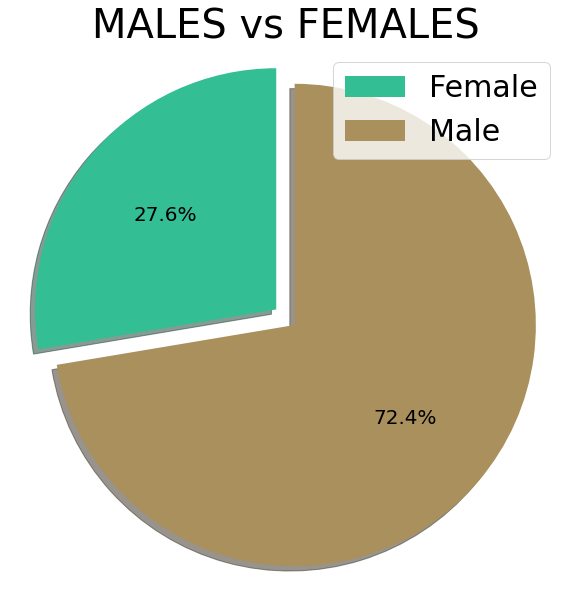

In [11]:
occorrenze_gender_mf={'Female':(df['Genere']=='Female').sum(),
                   'Male':(df['Genere']=='Male').sum() }
print(occorrenze_gender_mf)
plotta_label_pie_from_dict(occorrenze_gender_mf,size=(10,10),valori_plottati=2,title_chart='MALES vs FEMALES')

In [12]:
name_code_ds=pandas.read_csv(src+"topic_codes.csv")
name_code=name_code_ds['topic_code'].values
y_topic_dict={}
for nam in name_code:
    y_topic_dict[nam]=0

In [13]:
def Y_label_codes(df=df):
    codes=df['topic_codes'].values
    y_label_code=[]
    occ=0
    occ_print=200000
    for record_codes in codes:
        if str(record_codes)!='nan':
            record_codes_list=record_codes.split(',')
            label=y_topic_dict.copy()
            for cod in record_codes_list:
                label[cod]+=1
            y_label_code.append(np.array(list(label.values())))
        else:
            y_label_code.append(np.zeros(len(label)))
        if (occ%occ_print==0 and occ!=0) or (occ==(len(codes)-1)):
            print('analizzati',occ,'record')
        occ+=1
    return y_label_code

In [14]:
y_label_code=Y_label_codes(df)

analizzati 200000 record
analizzati 400000 record
analizzati 600000 record
analizzati 800000 record
analizzati 803065 record


In [15]:
def plot_topic_occ(codes, codes_names,size=(25, 50)):
    plt.figure(figsize=(25,25))
    y_ticks = np.arange(0, 126)
    fig, ax = plt.subplots(figsize = size)
    ax.barh(y_ticks, codes , color='seagreen')
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(codes_names)
    plt.ylabel("label")
    plt.xlabel("size")
    plt.show()

def vector_sum(y_topic_dict,y_label_code):
    somma=np.zeros(len(y_topic_dict))
    for vect in y_label_code:
    #     for x in vect:
    #         if (int(x)>1):
    #             print('true') #non vi sono codici duplicati nel medesimo testo
        somma+=vect
    return somma

def count_occ(somma,codes_names):
    occorrenze={}
    i=0
    for n in codes_names:
        occorrenze[n]=somma[i]
        i+=1
    #valori con occ >0
    i=0
    for k in occorrenze.keys():
        if (int(occorrenze[k])!=0.0):
            i+=1
    print("valori con occ>0:",i)
    return occorrenze

In [16]:
somma=vector_sum(y_topic_dict,y_label_code)
codes_names=list(y_topic_dict.keys())
occorrenze=count_occ(somma,codes_names)

valori con occ>0: 103


<Figure size 1800x1800 with 0 Axes>

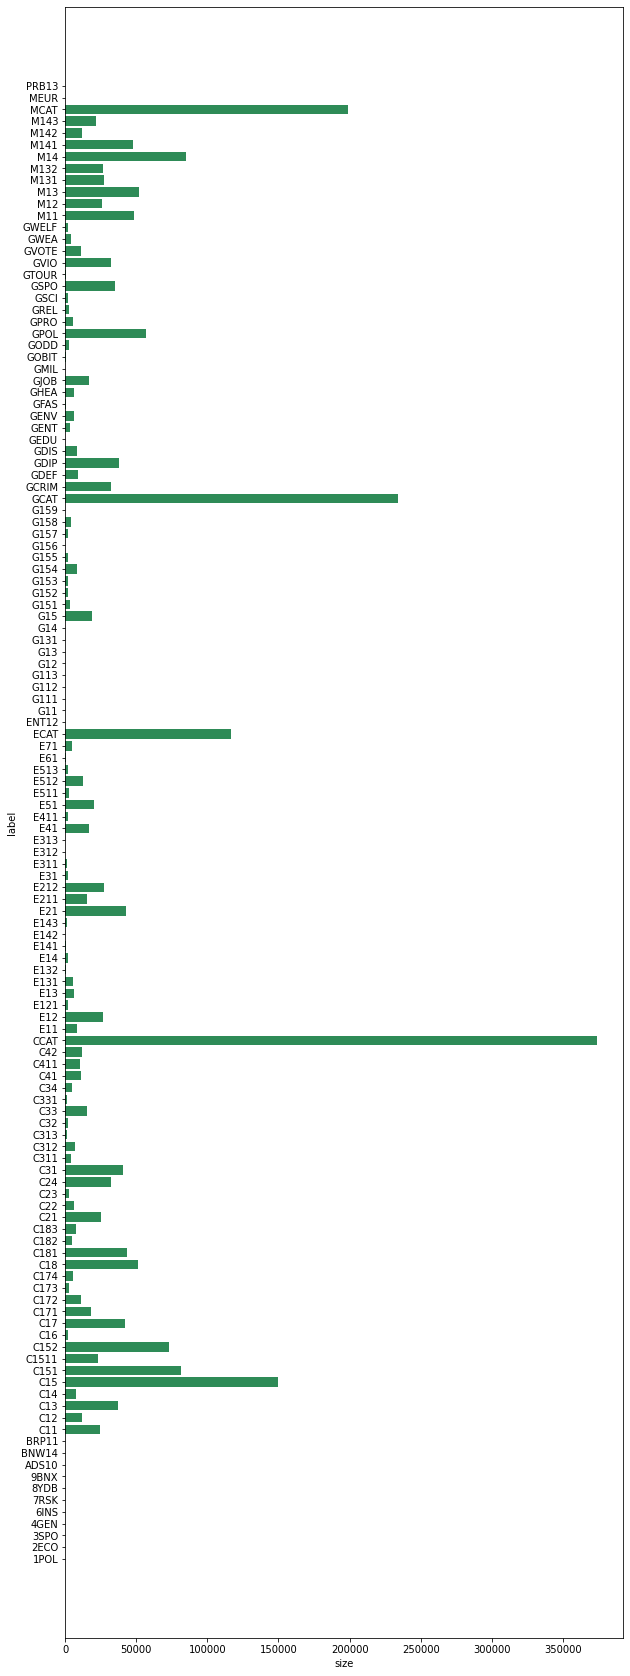

In [17]:
plot_topic_occ(somma, codes_names,size=(10,30))

In [18]:
len(codes_names)

126

In [19]:
with open(src+'topic_codes.csv', mode='r') as inp:
    reader = csv.reader(inp)
    dict_from_csv = {rows[0]:rows[1] for rows in reader}
del dict_from_csv['topic_code']
for i in range (len(somma)):
    print(list(codes_names)[i],dict_from_csv[list(codes_names)[i]],int(somma[i]))

1POL CURRENT NEWS - POLITICS 0
2ECO CURRENT NEWS - ECONOMICS 0
3SPO CURRENT NEWS - SPORT 0
4GEN CURRENT NEWS - GENERAL 0
6INS CURRENT NEWS - INSURANCE 0
7RSK CURRENT NEWS - RISK NEWS 0
8YDB TEMPORARY 0
9BNX TEMPORARY 0
ADS10 CURRENT NEWS - ADVERTISING 0
BNW14 CURRENT NEWS - BUSINESS NEWS 0
BRP11 CURRENT NEWS - BRANDS 0
C11 STRATEGY/PLANS 24294
C12 LEGAL/JUDICIAL 11866
C13 REGULATION/POLICY 37322
C14 SHARE LISTINGS 7405
C15 PERFORMANCE 149926
C151 ACCOUNTS/EARNINGS 81758
C1511 ANNUAL RESULTS 23184
C152 COMMENT/FORECASTS 72941
C16 INSOLVENCY/LIQUIDITY 1915
C17 FUNDING/CAPITAL 41794
C171 SHARE CAPITAL 18304
C172 BONDS/DEBT ISSUES 11481
C173 LOANS/CREDITS 2636
C174 CREDIT RATINGS 5861
C18 OWNERSHIP CHANGES 51398
C181 MERGERS/ACQUISITIONS 43276
C182 ASSET TRANSFERS 4669
C183 PRIVATISATIONS 7396
C21 PRODUCTION/SERVICES 25382
C22 NEW PRODUCTS/SERVICES 6096
C23 RESEARCH/DEVELOPMENT 2619
C24 CAPACITY/FACILITIES 32109
C31 MARKETS/MARKETING 40373
C311 DOMESTIC MARKETS 4296
C312 EXTERNAL MARKETS 6

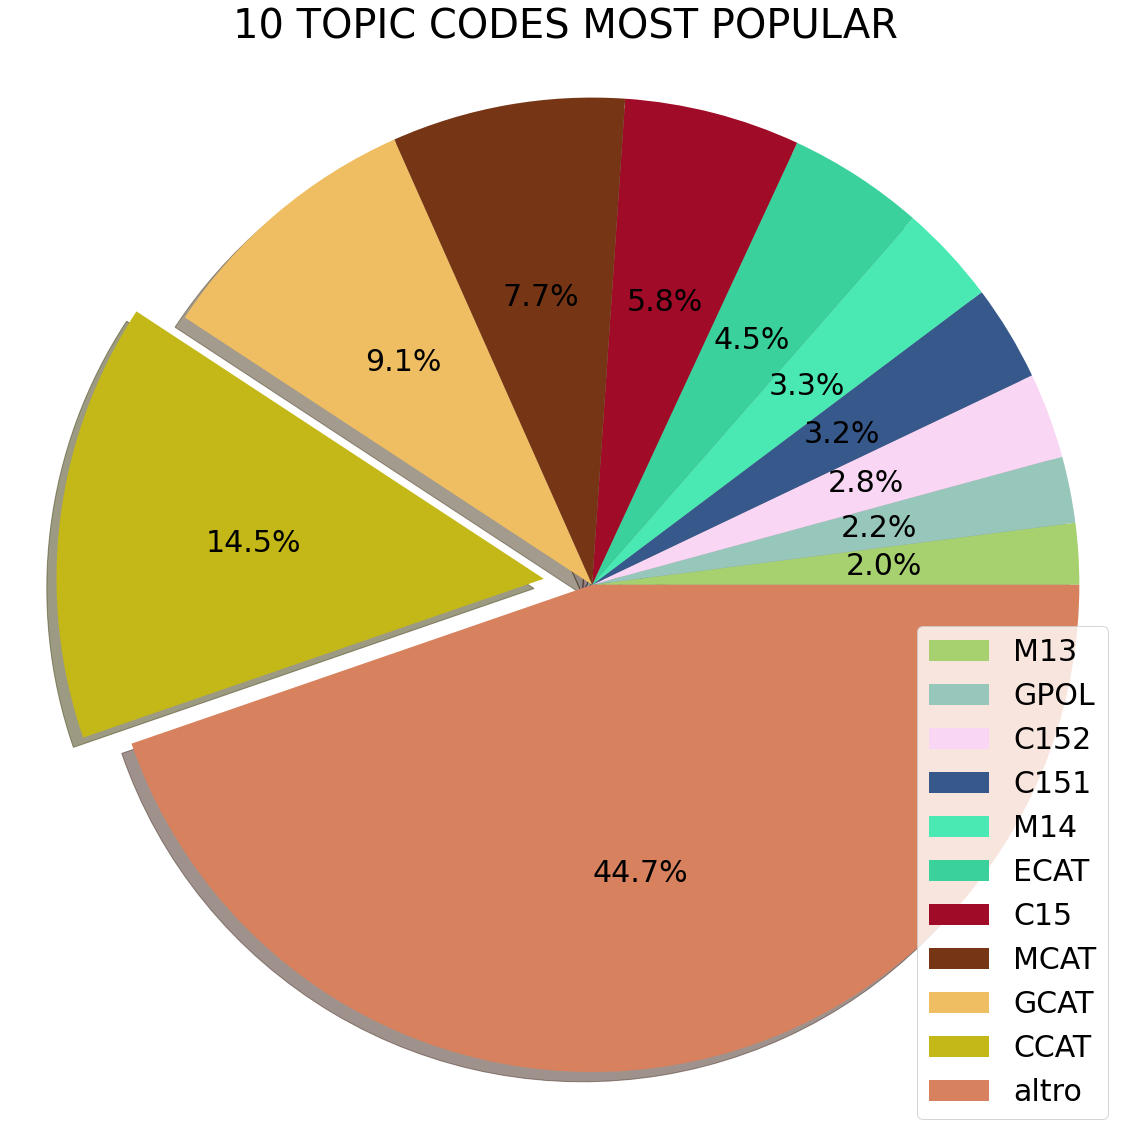

In [34]:
def plotta_label_pie_from_dict_(occorrenze,size=(20,20),valori_plottati=2,title_chart='tipologia',fz=40):
    #ordina dizionario
    lb=list(occorrenze.keys())  
    diz={}
    occ=list(occorrenze.values())
    for i in range (len(occorrenze)):
        diz[lb[i]]=occ[i]
    sorted_dict = {}
    sorted_dict = sorted(diz.items(), key = lambda kv: kv[1])
    
    stampa={}
    num_stampe=valori_plottati
    for i in range (len(occorrenze)-num_stampe,len(occorrenze)):
        stampa[sorted_dict[i][0]]=int(sorted_dict[i][1])

    
    if(len(occorrenze)-num_stampe)>0:
        stampa['altro']=0        
        for i in range (len(occorrenze)-num_stampe):
            stampa['altro']+=int(sorted_dict[i][1])
    #stampa=occorrenze
    t=len(stampa)
    cs = []
    n = t
    for i in range(n):
        cs.append('#%06X' % randint(0, 0xFFFFFF))
    labels = list(stampa.keys())
    sizes = list(stampa.values())
    explode = np.zeros(t) 
    explode[t-2]=0.1
    fig1, ax1 = plt.subplots(figsize=size)
    ax1.pie(sizes, explode=explode,  autopct='%1.1f%%', shadow=True, startangle=-0, textprops={'fontsize': 30},colors=cs)
    ax1.axis('equal')  
    ax1.legend(labels, prop={'size': 30})
    plt.title(title_chart,fontsize=fz)
    plt.show()
plotta_label_pie_from_dict_(occorrenze,size=(20,20),valori_plottati=10,title_chart='10 TOPIC CODES MOST POPULAR')

In [35]:
def conta_topic(ds):
    y_label_code=Y_label_codes(ds)
    somma=np.zeros(126)
    for vect in y_label_code:
        somma+=vect
    codes_names=list(y_topic_dict.keys())
    occorrenze={}
    i=0
    for n in codes_names:
        occorrenze[n]=somma[i]
        i+=1
    return occorrenze

#TOPIC FOR GENDER
ds_male =df.loc[df['Genere'] == 'Male']
ds_female = df.loc[df['Genere'] == 'Female']
ds_neutral = df.loc[df['Genere'] == 'Neutral']
occorrenze_f= conta_topic(ds_female)
occorrenze_m= conta_topic(ds_male)
occorrenze_n= conta_topic(ds_neutral)

analizzati 22018 record
analizzati 57639 record
analizzati 10027 record


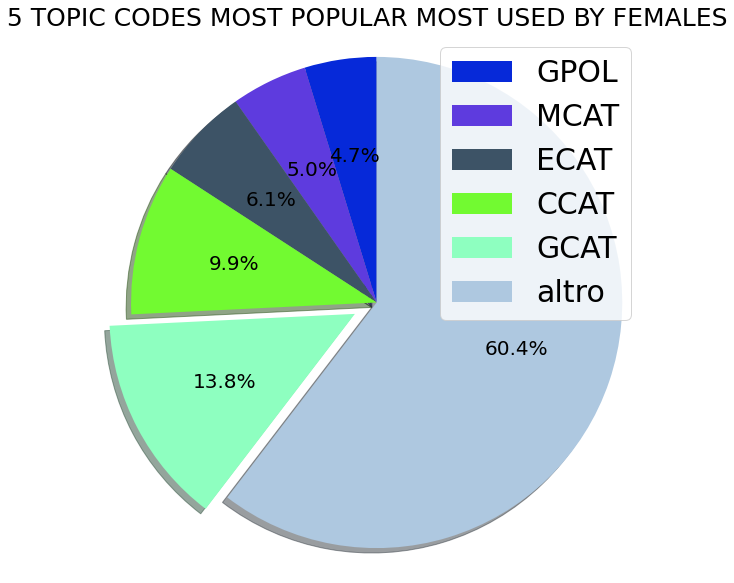

In [38]:
plotta_label_pie_from_dict(occorrenze_f,size=(10,10),valori_plottati=5,title_chart='5 TOPIC CODES MOST POPULAR MOST USED BY FEMALES',fz=25)

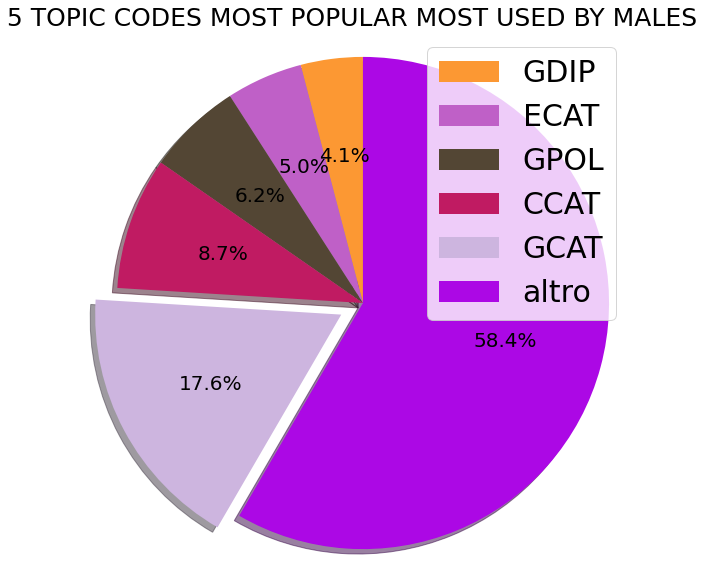

In [45]:
plotta_label_pie_from_dict(occorrenze_m,size=(10,10),valori_plottati=5,title_chart='5 TOPIC CODES MOST POPULAR MOST USED BY MALES',fz=25)

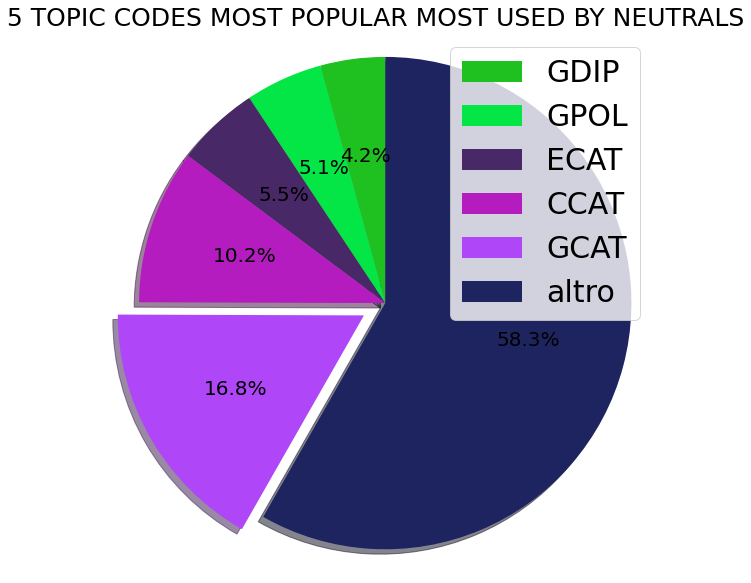

In [46]:
plotta_label_pie_from_dict(occorrenze_n,size=(10,10),valori_plottati=5,title_chart='5 TOPIC CODES MOST POPULAR MOST USED BY NEUTRALS',fz=25)

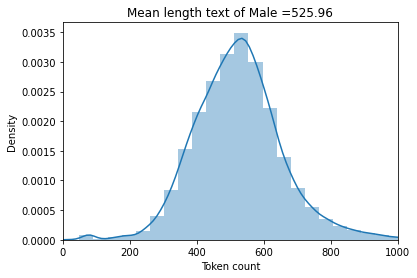

In [25]:
plot_token_occ(ds_male['text'].tolist(),0,1000,'Male','Mean length text of ')

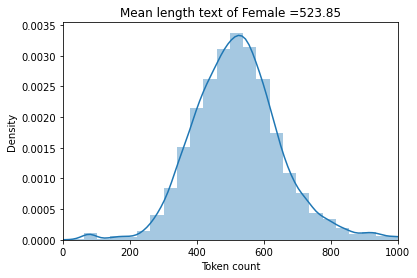

In [26]:
plot_token_occ(ds_female['text'].tolist(),0,1000,'Female','Mean length text of ')

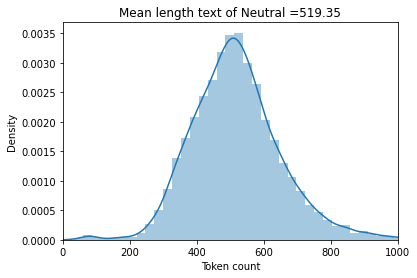

In [27]:
plot_token_occ(ds_neutral['text'].tolist(),0,1000,'Neutral','Mean length text of ')

---
# Count Quotes
---

In [28]:
conta_citazioni_male=0
conta_citazioni_female=0
conta_citazioni_neutri_unkown=0
ds_male 
ds_female 
ds_neutral

def conta_citazione(ds):
    index=0
    conta_citazioni=0
    for text in list(ds['text']):
        if str(text)!='nan':
            lista_cit=text.split('<<')
            if len(lista_cit)>=2:
                conta_citazioni+=1
                print(index)
            lista_cit=text.split('>>')
            if len(lista_cit)>=2:
                conta_citazioni+=1
                print(index)
            lista_cit=text.split('"')
            if len(lista_cit)>=2:
                conta_citazioni+=1
                print(index)
            index+=1
        else:
            print(str(text))
    print(conta_citazioni)
conta_citazione(df)


0


non vi sono citazioni nei testi